In [818]:
import scipy as sp
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
import skimage as ski
import cv2

# Mostrar la imagen y sus propiedades

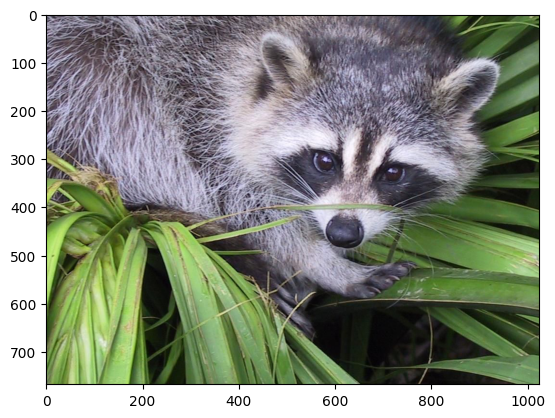

In [819]:
f = sp.datasets.face() # Cargamos la imagen Face de scipy
iio.imwrite("face.png", f) # Guardamos la imagen en un archivo
plt.imshow(f) # Mostramos la imagen
plt.show()


## Propiedades de la imagen

In [820]:
face = iio.imread('face.png') # Asignamos una variable a la imagen
type(face) # Imprimimos su tipo de dato

numpy.ndarray

In [821]:
face.shape, face.dtype # Pixeles de alto, ancho y "profundidad de color"

((768, 1024, 3), dtype('uint8'))

# Mapas de colores, contornos y contrastes

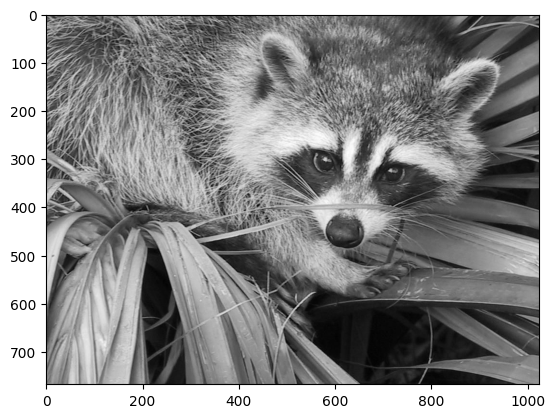

In [822]:
f = sp.datasets.face(gray=True) # Obtenemos la misma imagen en escala de grises
plt.imshow(f, cmap=plt.cm.gray) # Mostramos la imagen especificando el mapa de colores

In [823]:
f.shape, f.dtype # Traer la imagen en escala de grises elimina la "profundidad de color"

((768, 1024), dtype('uint8'))

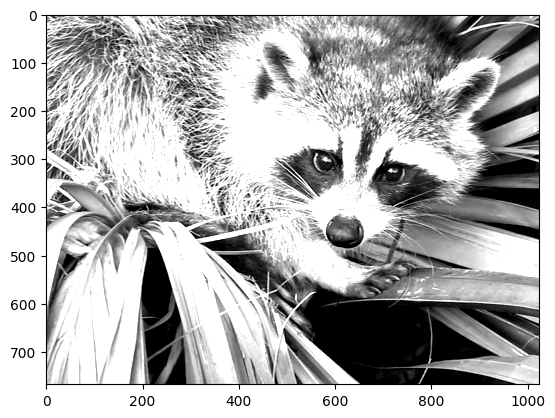

In [824]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=150) 
#Aumentamos el contraste haciendo que el valor minimo sea 30(Todo lo que este por debajo se convierte en 30)
#y el maximo 150(Todo lo que este por encima se convierte en 150)

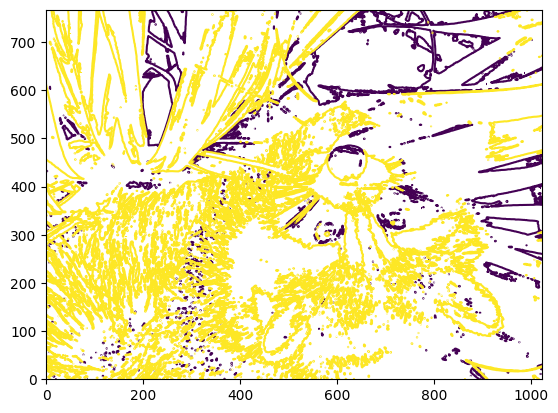

In [825]:
plt.contour(f, [30, 150]) #Se supone que deberia de dibujar las lineas de contorno de la imagen original pero no se porque tambien la invierte

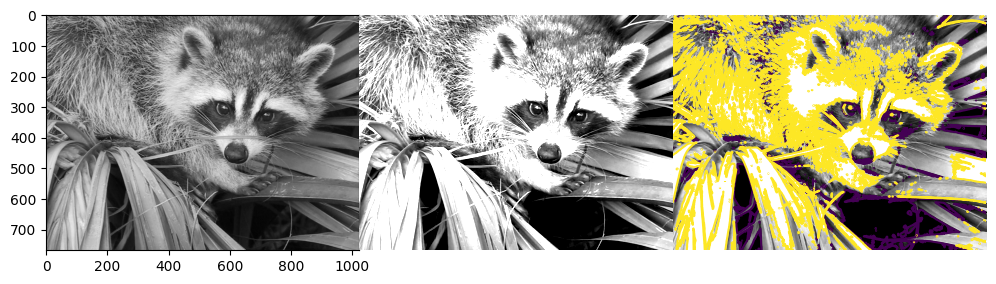

In [826]:
plt.figure(figsize=(10, 3.6))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray) # Mostramos la imagen en escala de grises

plt.subplot(132)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=150) # Mostramos la imagen con un contraste aumentado
plt.axis("off")

plt.subplot(133)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=150) 
plt.contour(f, [30, 150]) # Dibujamos las lineas de contorno sobre la imagen con contrastes aumentados
plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0.0, top=0.99, bottom=0.01, left=0.05, right=0.99) #Eliminamos el espacio entre imagenes y ajustamos los margenes

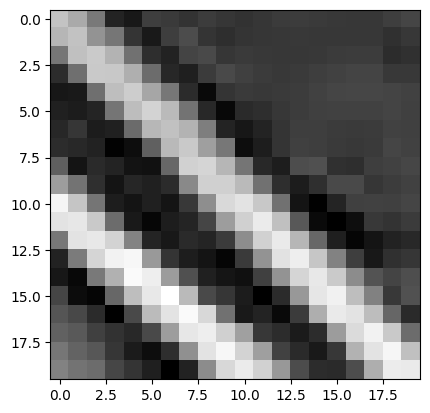

In [827]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray) #Hace un zoom en la imagen

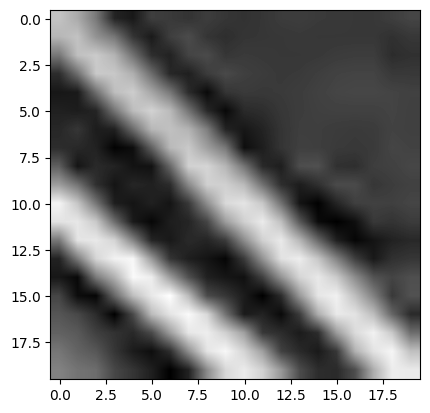

In [828]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear') #Mostramos el zoom utilizando interpolacion bilineal para suavizar la imagen

# Operaciones basicas

## Informacion de pixeles

In [829]:
face = sp.datasets.face(gray=True)
face[0, 40] #Obtenemos el valor del pixel en la posicion 0,40

127

In [830]:
face[10:13, 20:23] #Obtenemos los valores de los pixeles en el rango de 10 a 13 y 20 a 23

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

## Slice

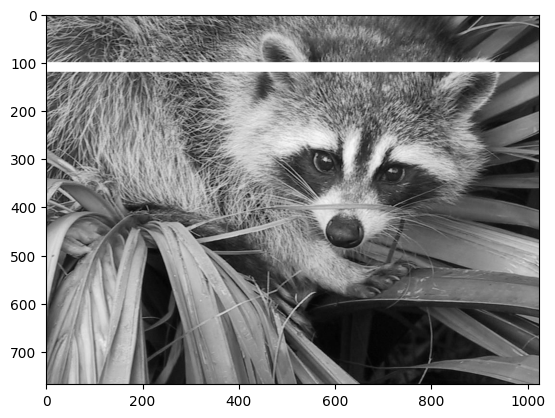

In [831]:
face[100:120] = 255 #Cambiamos los valores de los pixeles en el rango de 100 a 120 a 255 para que sean blancos
plt.imshow(face, cmap=plt.cm.gray) 

## Mascaras

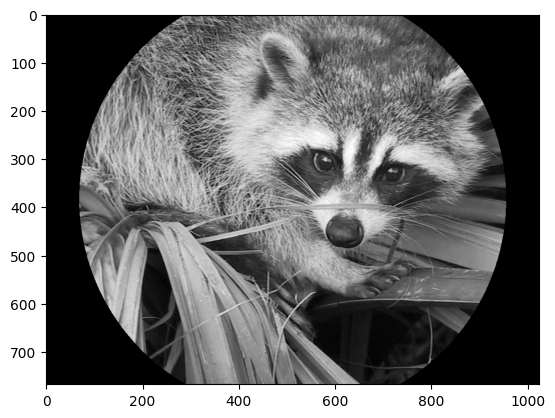

In [832]:
face = sp.datasets.face(gray=True) #Restauramos la imagen
lx, ly = face.shape #Obtenemos los limites de la imagen
X, Y = np.ogrid[0:lx, 0:ly] #Creamos una malla de pixeles
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4 #Esto no se que hace
face[mask] = 0 #Convierte los pixeles que cumplan la condicion en 0
plt.imshow(face, cmap=plt.cm.gray) 

## Fancy indexing

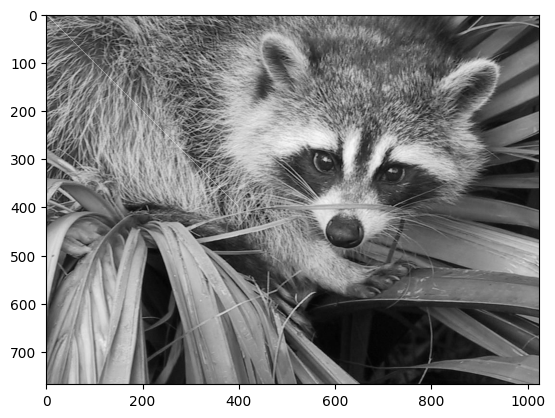

In [833]:
face = sp.datasets.face(gray=True) #Restauramos la imagen
face[range(400), range(400)] = 255 #Dibuja una linea blanca sobre la diagonal principal en la imagen hasta el pixel 400,400
plt.imshow(face, cmap=plt.cm.gray) 

## Informacion estadistica

In [834]:
face = sp.datasets.face(gray=True) 
face.mean() # Valor promedio de los pixeles en escalas de grises

113.48026784261067

In [835]:
face.max(), face.min() #Valor maximo y minimo en la imagen

(250, 0)

## Transformaciones Geometricas

### Recorte

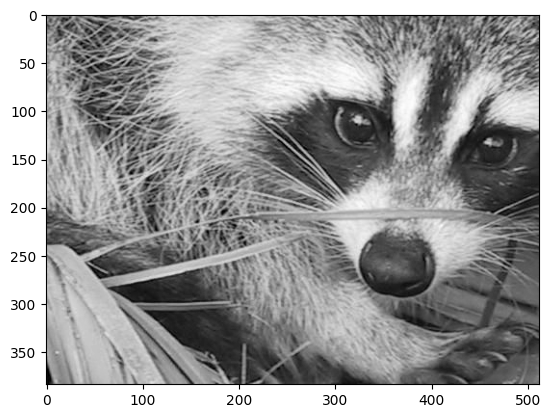

In [836]:
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4] #Limites del recorte
plt.imshow(crop_face, cmap=plt.cm.gray) 

### Invertir con respecto a la horizontal

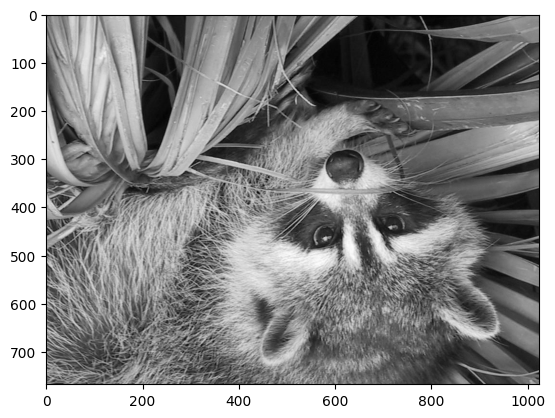

In [837]:
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)

### Rotaciones

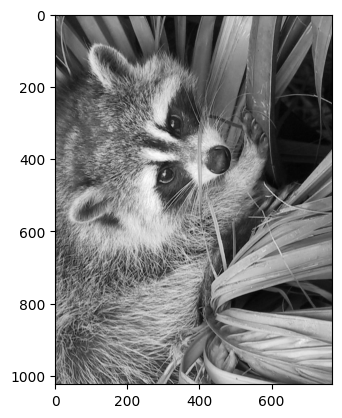

In [838]:
rotate_face = sp.ndimage.rotate(face, 90) #Rotamos la imagen 90 grados y actualiza los limites de la imagen
plt.imshow(rotate_face, cmap=plt.cm.gray)

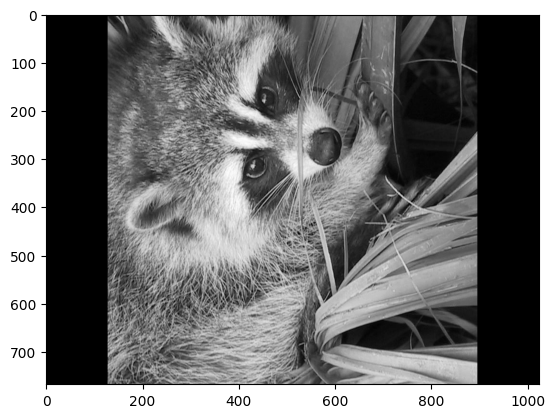

In [839]:
rotate_face_noreshape = sp.ndimage.rotate(face, 90, reshape=False) #Rotamos la imagen 90 grados sin actualizar los limites de la imagen
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)

# Filtros

## Gaussiano

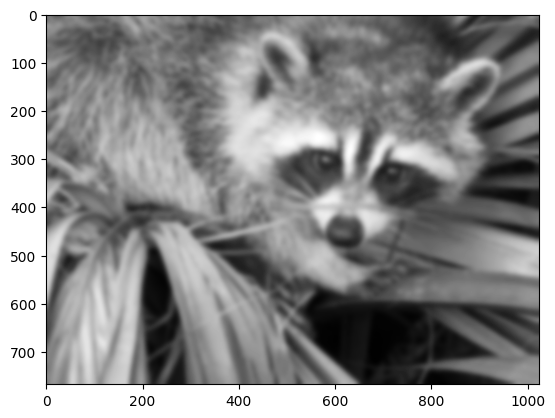

In [840]:
blurred_face = sp.ndimage.gaussian_filter(face, sigma=5) #Desenfoca la imagen dependiendo del valor del sigma
plt.imshow(blurred_face, cmap=plt.cm.gray)

## Uniforme

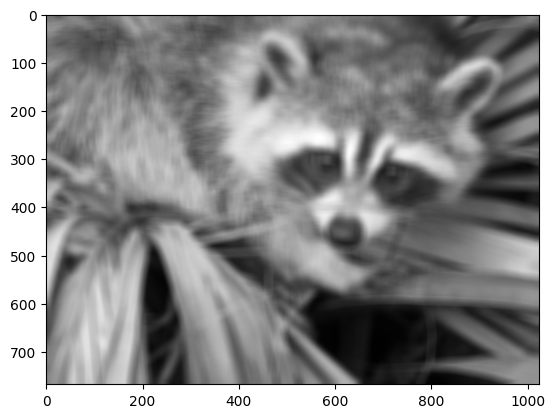

In [841]:
local_mean = sp.ndimage.uniform_filter(face, size=20) #Desenfoca la imagen dependiendo del valor del "size" (Probablemente la matematica detras de ambos filtros sea diferente?)
plt.imshow(local_mean, cmap=plt.cm.gray)

## Sharpening 

Buscar que es una aproximacion de laplace

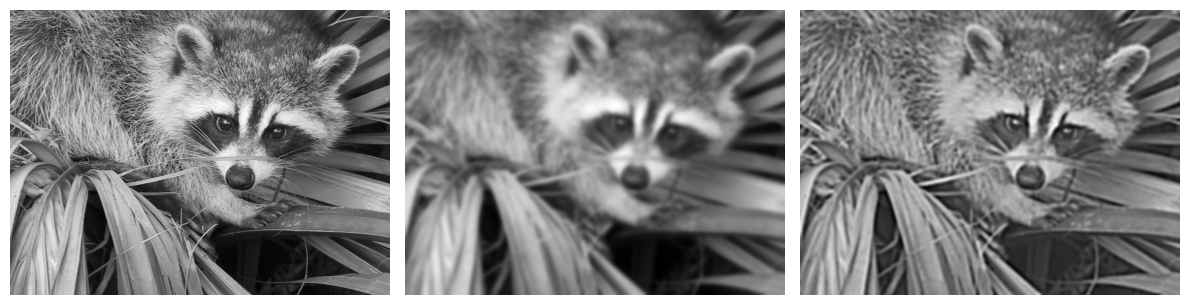

In [842]:
f = sp.datasets.face(gray=True).astype(float)
blurred_f = sp.ndimage.gaussian_filter(f, 5)

filter_blurred_f = sp.ndimage.gaussian_filter(blurred_f, 1)

alpha = 100
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f) 

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis("off")

plt.tight_layout() #En resumen intenta mejorar una imagen la calidad  despues de un filtro gaussiano 


## Denoising

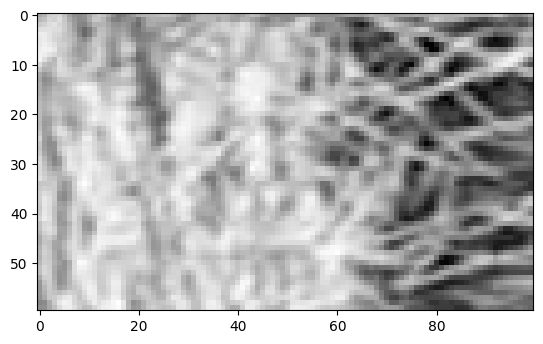

In [843]:
f = face[230:290, 220:320] #Zoom original sin ruido
plt.imshow(f, cmap=plt.cm.gray)

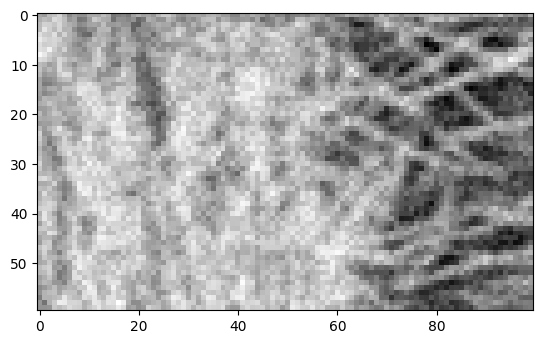

In [844]:
rng = np.random.default_rng() #Generador de numeros aleatorios
noisy = f +  f.std() * rng.random(f.shape) #.std es la desviacion estandar 
plt.imshow(noisy, cmap=plt.cm.gray)

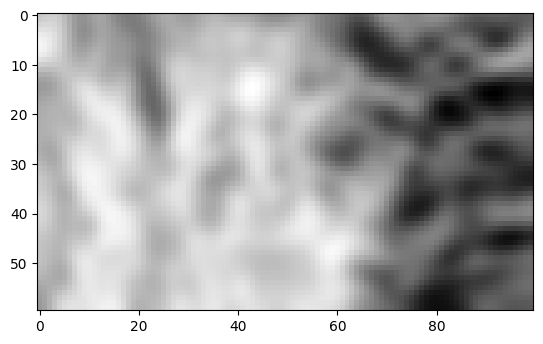

In [845]:
gauss_denoised = sp.ndimage.gaussian_filter(noisy, 2) #Desenfoca la imagen para eliminar el ruido pero tambien se pierde calidad de la imagen
plt.imshow(gauss_denoised, cmap=plt.cm.gray)

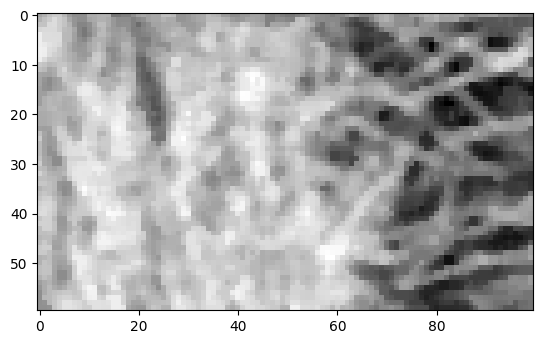

In [846]:
med_denoised = sp.ndimage.median_filter(noisy, 3) #Elimina el ruido, se pierde calidad de la imagen pero respeta un poco mas los bordes
plt.imshow(med_denoised, cmap=plt.cm.gray)

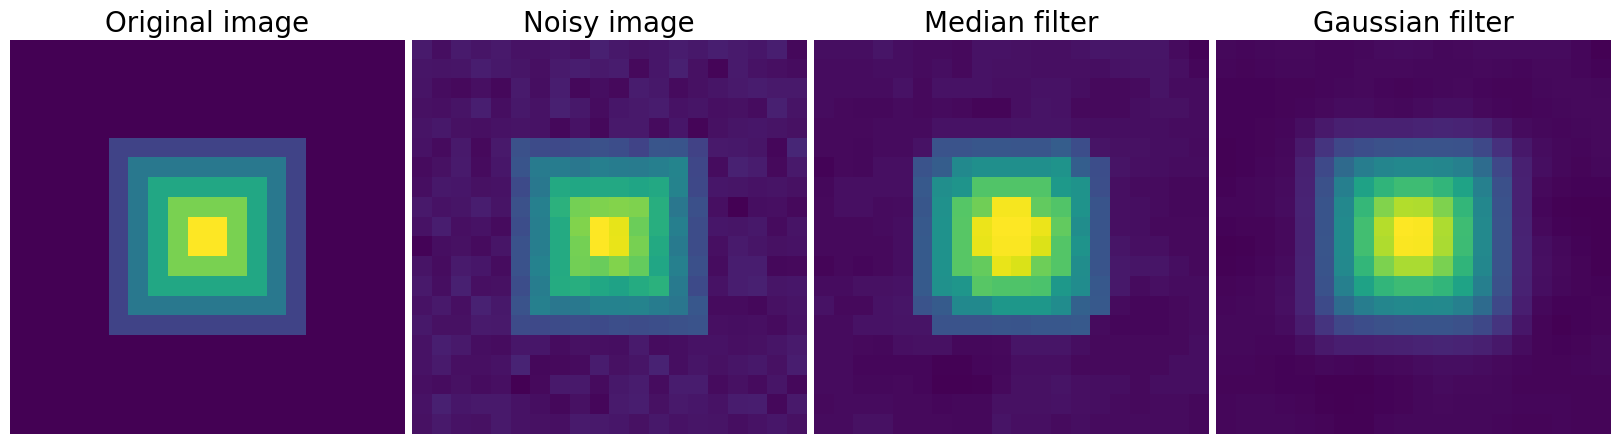

In [847]:
rng = np.random.default_rng()

im = np.zeros((20, 20)) # Se crea la imagen vacia
im[5:-5, 5:-5] = 1 # Se dibuja un cuadrado en la imagen
im = sp.ndimage.distance_transform_bf(im) #Se aplica una transformacion de distancia sobre el cuadrado
im_noise = im + 0.1 * rng.normal(size=im.shape)

im_med = sp.ndimage.median_filter(im_noise, 3)
im_gauss = sp.ndimage.gaussian_filter(im_noise, 1)

plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(im, interpolation="nearest")
plt.axis("off")
plt.title("Original image", fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation="nearest")
plt.axis("off")
plt.title("Noisy image", fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation="nearest")
plt.axis("off")
plt.title("Median filter", fontsize=20)
plt.subplot(144)
plt.imshow(im_gauss, interpolation="nearest")
plt.axis("off")
plt.title("Gaussian filter", fontsize=20)

#Se aprecia mejor lo que hace cada filtro con la imagen generada

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1)

plt.show()

## Morfologia Matematica

### Erosion

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

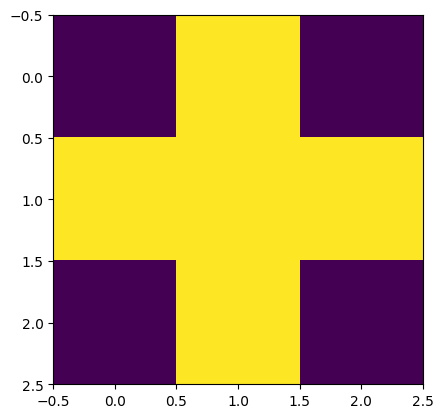

In [848]:
el = sp.ndimage.generate_binary_structure(2, 1) #Estructura binaria con la cual interactuan los filtros de morfologia matematica
plt.imshow(el)
el.astype(int)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])

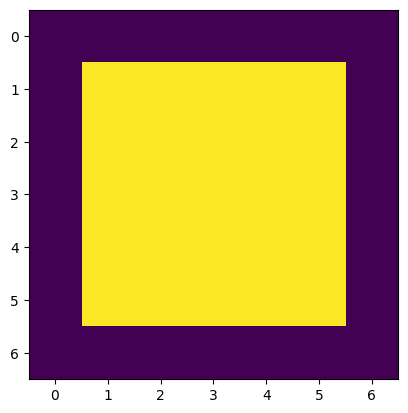

In [849]:
a = np.zeros((7,7), dtype=int) #Creamos una imagen de 7x7
a[1:6, 1:6] = 1 #Dibuja un cuadrado en la imagen
plt.imshow(a)
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

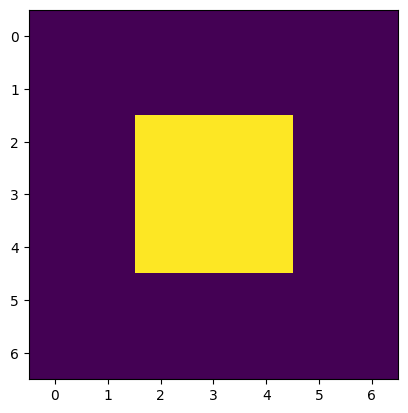

In [850]:
plt.imshow(sp.ndimage.binary_erosion(a)) #Originalmente interpola sobre una estructura como la mostrada arriba con centro en el pixel de interes convirtiendo el valor del pixel en el minimo detectado de la estructura
sp.ndimage.binary_erosion(a).astype(int) #Al parecer la erosion elimina los bordes y solo deja lo que esta dentro de estos

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

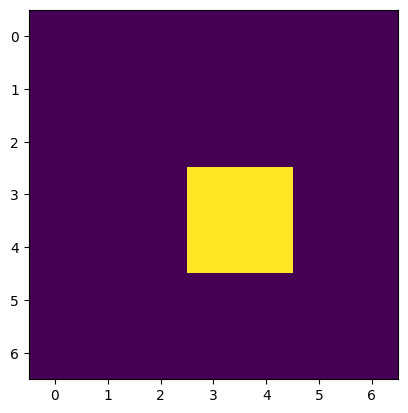

In [851]:
plt.imshow(sp.ndimage.binary_erosion(a, structure=np.ones((4,4))))#Se puede modificar el rango de la estructura y en estructuras pares el rango se extiende hacia la izquierda y hacia arriba
sp.ndimage.binary_erosion(a, structure=np.ones((4,4))).astype(int)


### Dilatacion

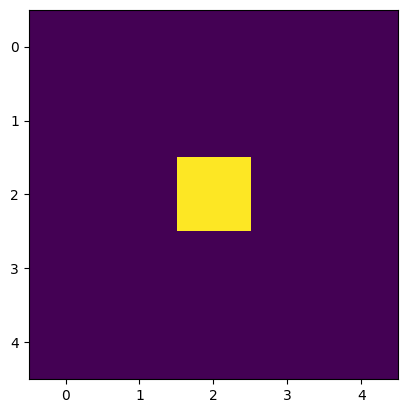

In [852]:
a = np.zeros((5, 5))
a[2, 2] = 1 
plt.imshow(a) #Imagen diferente para ver mejor como interactua la estructura

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

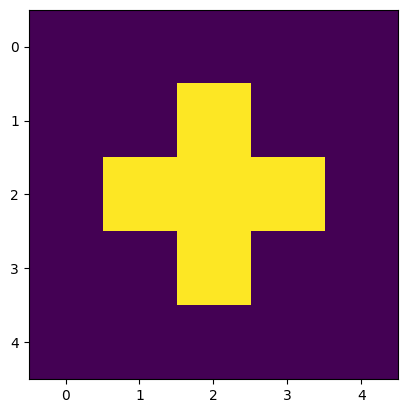

In [853]:
plt.imshow(sp.ndimage.binary_dilation(a))
sp.ndimage.binary_dilation(a).astype(int) #La dilatacion toma el valor maximo en vez del minimo

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

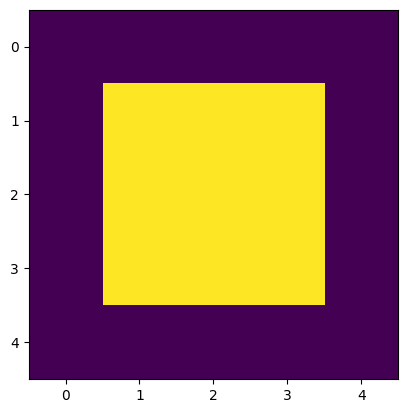

In [854]:
plt.imshow(sp.ndimage.binary_dilation(a,structure=np.ones((3,3)))) #Si queremos que tambien interactue con los bordes podemos cambiar la estructura a un cuadrado
sp.ndimage.binary_dilation(a,structure=np.ones((3,3))).astype(int) 

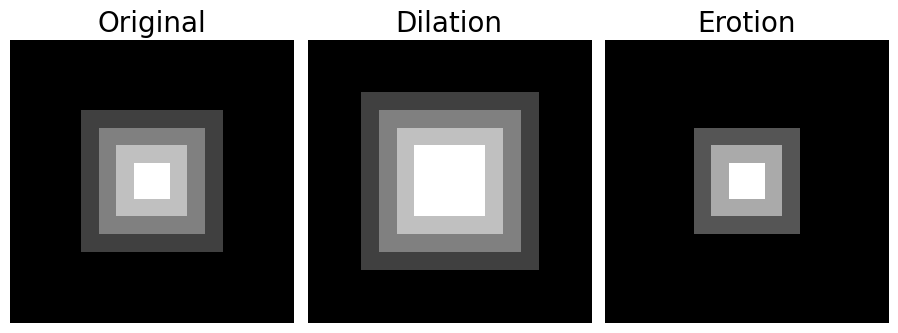

In [855]:

im = np.zeros((64, 64))
rng = np.random.default_rng()
x, y = (63 * rng.random((2, 8))).astype(int)
im[x, y] = np.arange(8)

bigger_points = sp.ndimage.grey_dilation(im, size=(5, 5), structure=np.ones((5, 5)))

square = np.zeros((16, 16))
square[4:-4, 4:-4] = 1
dist = sp.ndimage.distance_transform_bf(square)
dilate_dist = sp.ndimage.grey_dilation(dist, structure=np.ones((3, 3)))
erotote_dist = sp.ndimage.grey_erosion(dist, structure=np.ones((3, 3)))

plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.imshow(dist, interpolation="nearest", cmap=plt.cm.gray)
plt.axis("off")
plt.title("Original", fontsize=20)
plt.subplot(142)
plt.imshow(dilate_dist, interpolation="nearest", cmap=plt.cm.gray)
plt.axis("off")
plt.title("Dilation", fontsize=20)
plt.subplot(143)
plt.imshow(erotote_dist, interpolation="nearest", cmap=plt.cm.gray)
plt.axis("off")
plt.title("Erotion", fontsize=20)

plt.subplots_adjust(wspace=0.05, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)#Tambien funciona para imagenes en escala de grises solo hay que cambiar el nombre de la funcion

## Opening

Opening = erosion + dilation

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

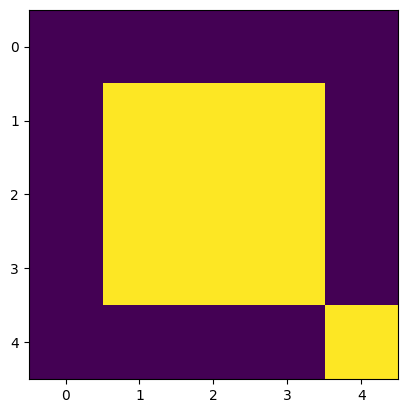

In [856]:
a = np.zeros((5,5), dtype=int)
a[1:4, 1:4] = 1; a[4, 4] = 1
plt.imshow(a)
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

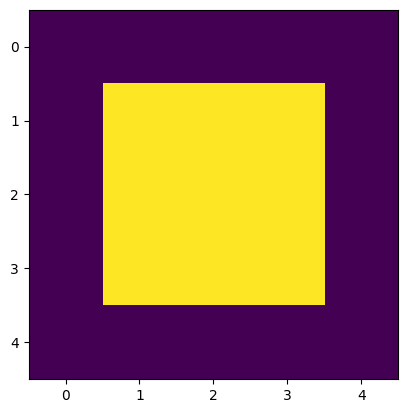

In [857]:
plt.imshow(sp.ndimage.binary_opening(a, structure=np.ones((3,3)))) #Se usa para eliminar ruido en las imagenes
sp.ndimage.binary_opening(a, structure=np.ones((3,3))).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

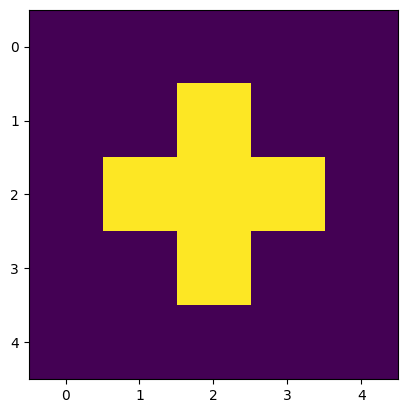

In [858]:
plt.imshow(sp.ndimage.binary_opening(a)) #Se puede usar para redondear las esquinas
sp.ndimage.binary_opening(a).astype(int)

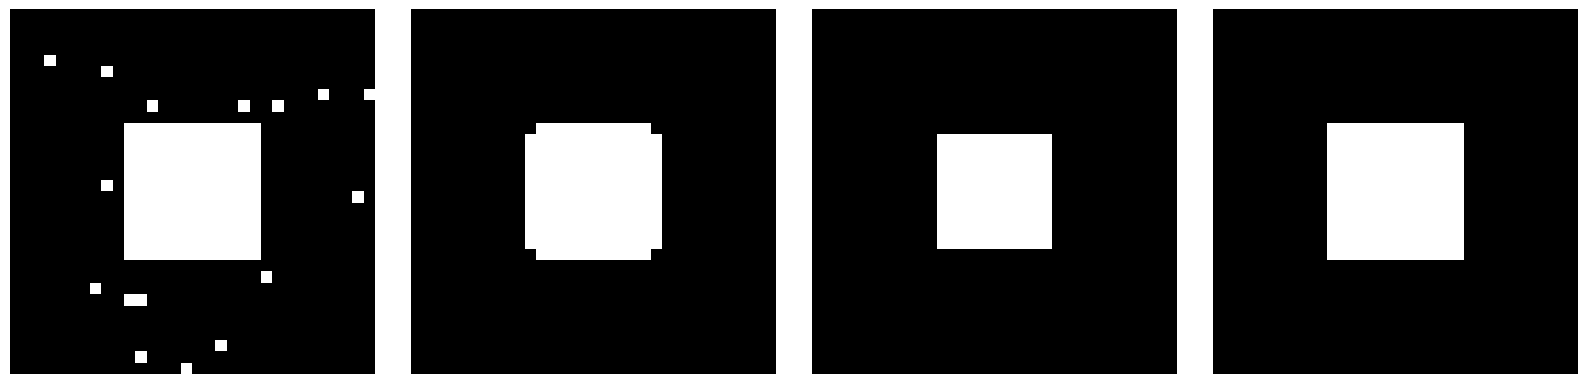

In [859]:
square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1
rng = np.random.default_rng(27446968)
x, y = (32 * rng.random((2, 20))).astype(int)
square[x, y] = 1

open_square = sp.ndimage.binary_opening(square)

eroded_square = sp.ndimage.binary_erosion(square)
reconstruction = sp.ndimage.binary_propagation(eroded_square, mask=square) 
#La propagación binaria es un proceso iterativo en el cual se expande una región de píxeles etiquetados en una imagen, bajo ciertas condiciones dictadas por una máscara.
plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(square, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")
plt.subplot(142)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")
plt.subplot(143)
plt.imshow(eroded_square, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")
plt.subplot(144)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")



plt.subplots_adjust(wspace=0.1, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)

## Closing

Closing: dilation + erosion

# Extraccion de caracteristicas

## Deteccion de bordes

Buscar como funciona el operador de sobel

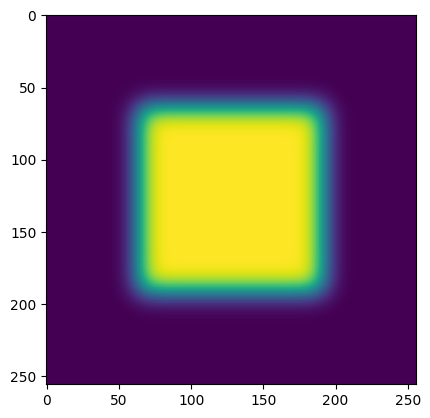

In [860]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1
im = sp.ndimage.gaussian_filter(im, 8) #Imagen original
plt.imshow(im) 

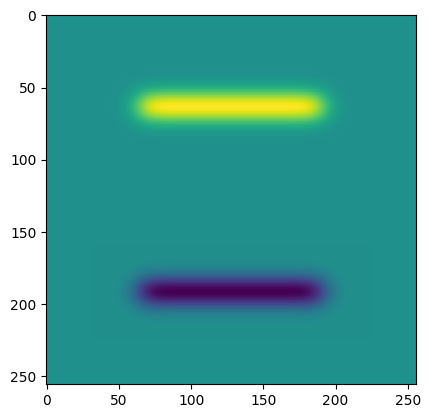

In [861]:
sx = sp.ndimage.sobel(im, axis=0, mode='constant') #Aplicamos el filtro de sobel en el eje "x" y detecta el superior e inferior del cuadrado
plt.imshow(sx)

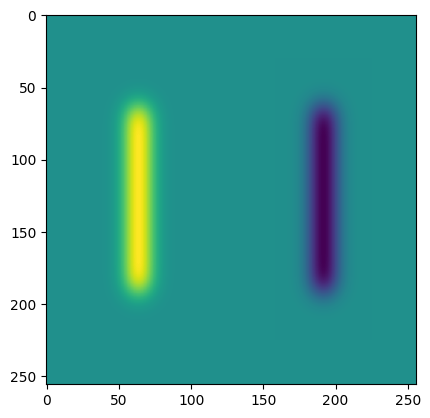

In [862]:
sy = sp.ndimage.sobel(im, axis=1, mode='constant') #Aplicamos el filtro de sobel en el eje "y" y detecta los bordes laterales del cuadrado
plt.imshow(sy)

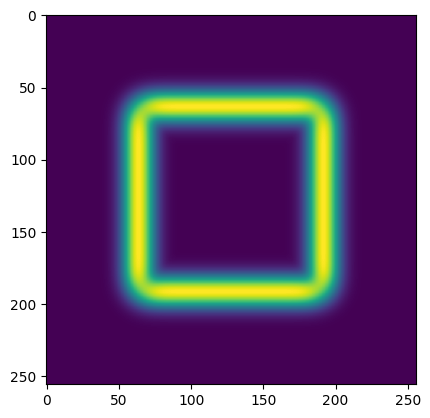

In [863]:
sob = np.hypot(sx, sy) #Aplicamos el filtro de sobel en ambos ejes y se obtiene la magnitud de los bordes para detecter todo el cuadrado 
plt.imshow(sob)

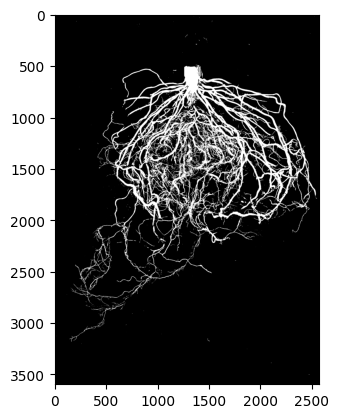

In [947]:
im = cv2.imread("C:/Users/juanm/OneDrive/Documentos/A_0/Universidad/Semilleros/Mecanica Aplicada/Reporte/G2_GW1_1_3.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
umbral,im1 = cv2.threshold(im, 0, 255,  cv2.THRESH_OTSU) 
sx = sp.ndimage.sobel(im1, axis=0, mode='constant')
sy = sp.ndimage.sobel(im1, axis=1, mode='constant')
sob = np.hypot(sx, sy)
plt.imshow(im1, cmap=plt.cm.gray)

C:\Users\juanm\AppData\Local\Temp\ipykernel_18452\1396742813.py:1: DeprecationWarning: Please use `binary_erosion` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  er = sp.ndimage.morphology.binary_erosion(im1, structure=ski.morphology.diamond(1))


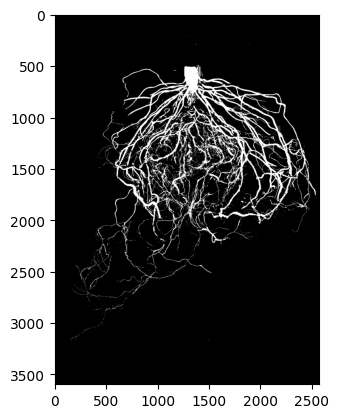

In [948]:
er = sp.ndimage.morphology.binary_erosion(im1, structure=ski.morphology.diamond(1))
plt.imshow(er, cmap=plt.cm.gray)

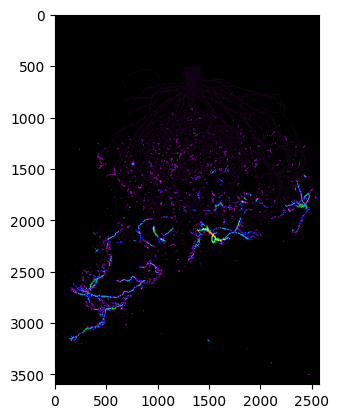

In [949]:
label_im, nb_labels = sp.ndimage.label(im1)
plt.imshow(label_im, cmap='nipy_spectral')

In [950]:
nb_labels

3776

In [951]:
sizes = sp.ndimage.sum(im1, label_im, range(nb_labels + 1))
sizes

array([   0.,  255.,  765., ..., 4590., 1020.,  510.])

In [952]:
mask_size = sizes < (sizes.max() - 10) 

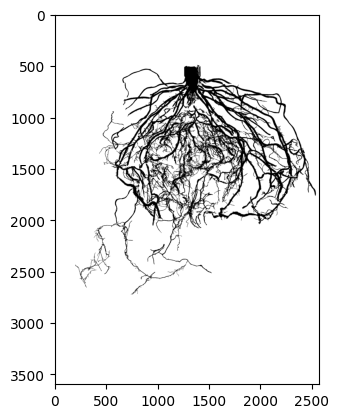

In [953]:
remove_pixel = mask_size[label_im] 
plt.imshow(remove_pixel,cmap=plt.cm.gray)

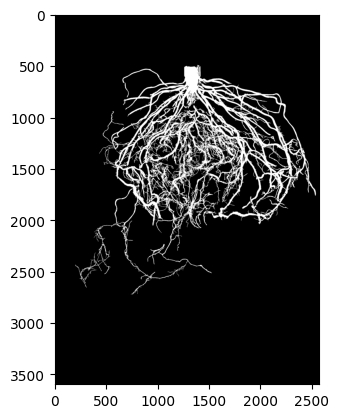

In [954]:
label_im[remove_pixel] = 0
plt.imshow(label_im, cmap=plt.cm.gray)

In [955]:
labels = np.unique(label_im)
labels

array([ 0, 39])

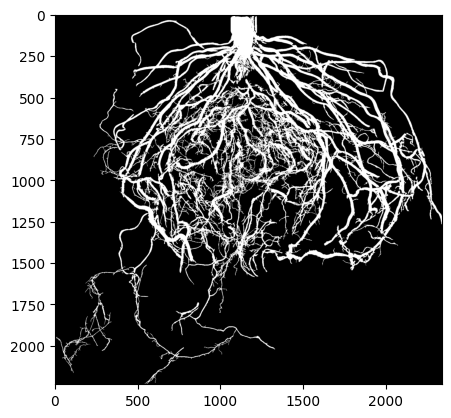

In [956]:
slice_x, slice_y = sp.ndimage.find_objects(label_im == labels[1])[0] 
roi = label_im[slice_x, slice_y] 
plt.imshow(roi, cmap=plt.cm.gray)

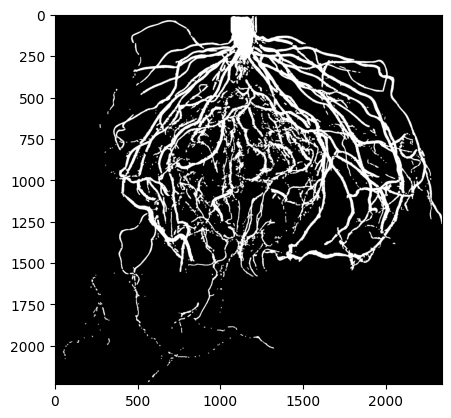

In [957]:
raiz = sp.ndimage.binary_opening(roi, structure=np.ones((5,5)))
plt.imshow(raiz,cmap=plt.cm.gray)

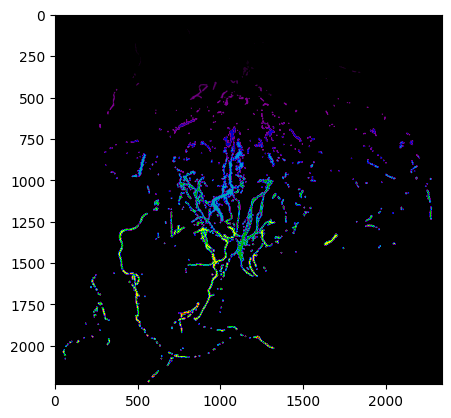

In [958]:
label_im, nb_labels = sp.ndimage.label(raiz)
plt.imshow(label_im, cmap='nipy_spectral')

In [959]:
sizes = sp.ndimage.sum(raiz, label_im, range(nb_labels + 1))
sizes.max()

565810.0

In [960]:
mask_size = sizes < (sizes.max() - 10) 

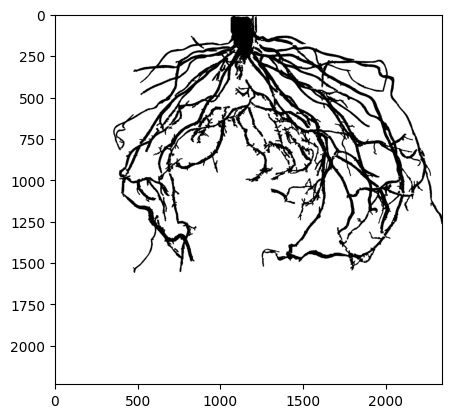

In [961]:
remove_pixel = mask_size[label_im] 
plt.imshow(remove_pixel,cmap=plt.cm.gray)

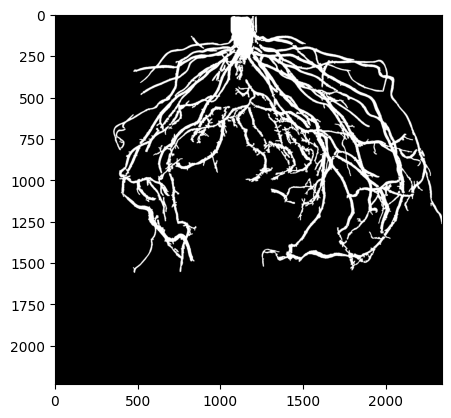

In [962]:
label_im[remove_pixel] = 0
plt.imshow(label_im, cmap=plt.cm.gray)

In [963]:
labels = np.unique(label_im)
labels

array([0, 1])

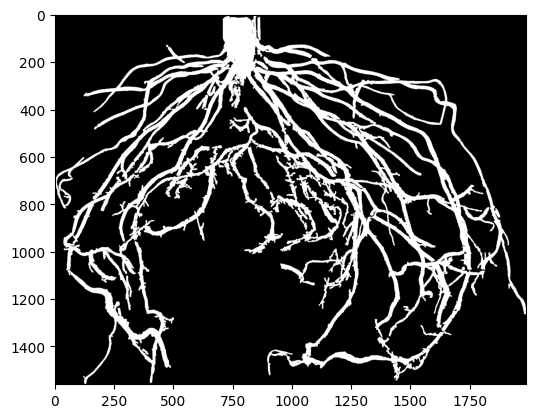

In [964]:
slice_x, slice_y = sp.ndimage.find_objects(label_im == labels[1])[0] 
roi = label_im[slice_x, slice_y] 
plt.imshow(roi, cmap=plt.cm.gray)

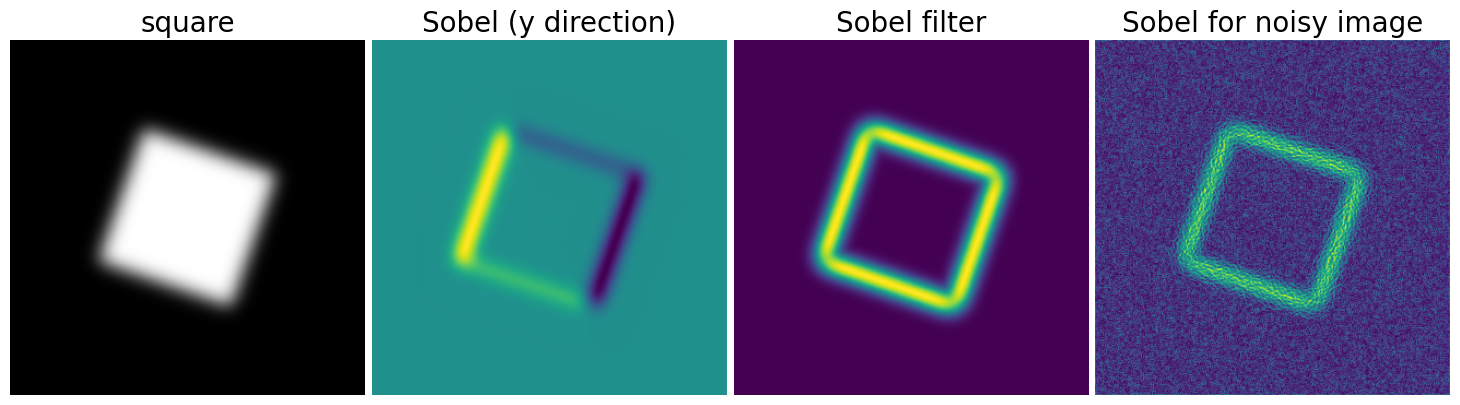

In [965]:
rng = np.random.default_rng()

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = sp.ndimage.rotate(im, 71, mode="constant") #Se verifica que funcione para imagenes en cualquier orientacion
im = sp.ndimage.gaussian_filter(im, 8)

sx = sp.ndimage.sobel(im, axis=0, mode="constant")
sy = sp.ndimage.sobel(im, axis=1, mode="constant")
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis("off")
plt.title("square", fontsize=20)
plt.subplot(142)
plt.imshow(sy)
plt.axis("off")
plt.title("Sobel (y direction)", fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis("off")
plt.title("Sobel filter", fontsize=20)

im += 0.07 * rng.random(im.shape) #Se le agrega algo de ruido para ver como afecta el filtro de sobel

sx = sp.ndimage.sobel(im, axis=0, mode="constant")
sy = sp.ndimage.sobel(im, axis=1, mode="constant")
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis("off")
plt.title("Sobel for noisy image", fontsize=20)


plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

Preguntar que significa el amarillo y el morado 

## Segmentacion

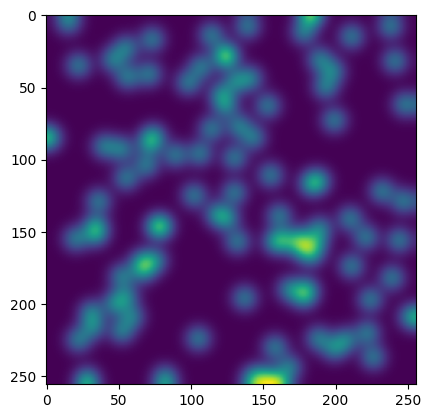

In [966]:
n = 10
l = 256 #Tamaño de la imagen
im = np.zeros((l, l))
rng = np.random.default_rng()
points = l*rng.random((2, n**2)) #Primer numero es el tamaño de los puntos y el segundo es el numero de puntos
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = sp.ndimage.gaussian_filter(im, sigma=l/(4.*n))
plt.imshow(im) #Imagen original

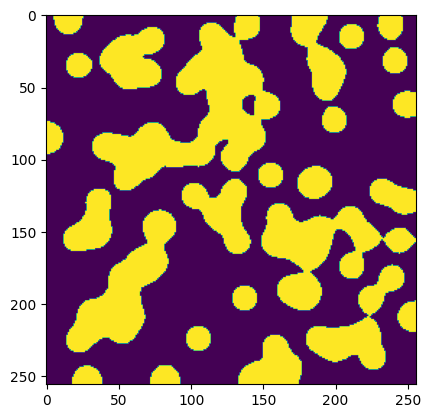

In [967]:
mask = (im > im.mean()).astype(float)#Se crea una mascara con los valores mayores al promedio de la imagen
plt.imshow(mask)

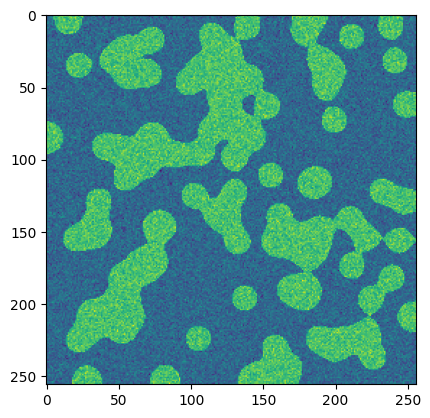

In [968]:
img = mask + 0.2*rng.standard_normal(mask.shape) #Se le agrega ruido con una distribucion normal a la mascara
plt.imshow(img)

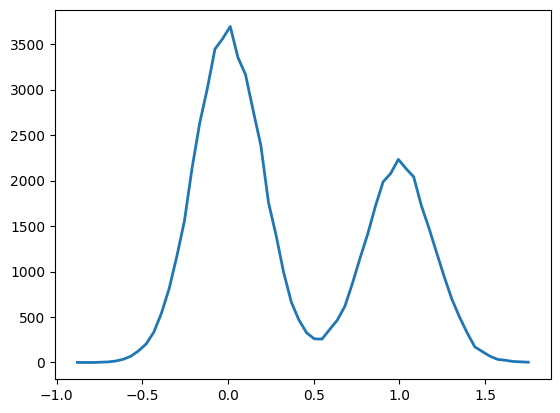

In [969]:
br = 0.5
hist, bin_edges = np.histogram(img, bins=60) #Sacamos un histograma de la imagen
bin_centers = br*(bin_edges[:-1] + bin_edges[1:])#El numero que multiplica va a ser el valle entre las 2 crestas
plt.plot(bin_centers, hist, lw=2) #Se grafica el histograma

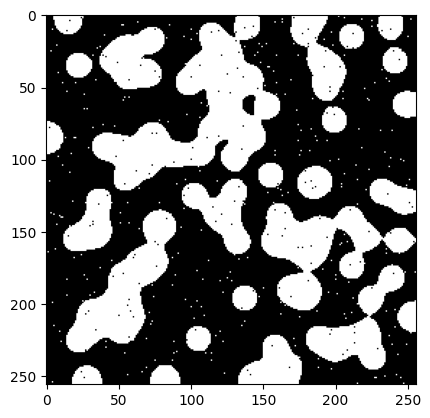

In [970]:
binary_img = img > 0.5
plt.imshow(binary_img, cmap=plt.cm.gray)

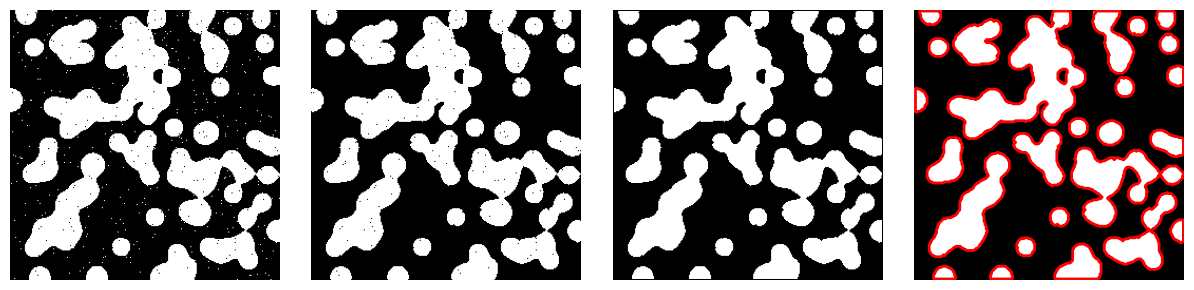

In [971]:
open_img = sp.ndimage.binary_opening(binary_img) #Remueve el ruido exterior
close_img = sp.ndimage.binary_closing(open_img)# Remueve el ruido interior

plt.figure(figsize=(12, 3))

plt.subplot(141)
plt.imshow(binary_img[:l, :l], cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(142)
plt.imshow(open_img[:l, :l], cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(143)
plt.imshow(close_img[:l, :l], cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(144)
plt.imshow(mask[:l, :l], cmap=plt.cm.gray)
plt.contour(close_img[:l, :l], [0.5], linewidths=2, colors="r")
plt.axis("off")

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)

plt.show()

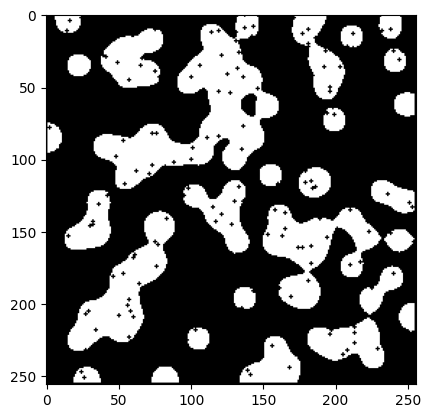

In [972]:
eroded_img = sp.ndimage.binary_erosion(binary_img) #Remueve todo le ruido que este aisaldo(Es decir que no este conectado a la imagen principal)
plt.imshow(eroded_img, cmap=plt.cm.gray)

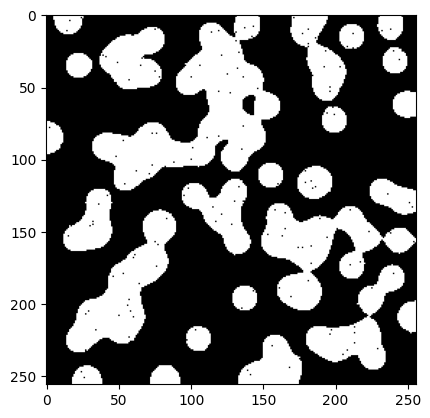

In [973]:
reconstruct_img = sp.ndimage.binary_propagation(eroded_img, mask=binary_img) #Recorre la imagen para reconstruir los bordes
plt.imshow(reconstruct_img, cmap=plt.cm.gray)

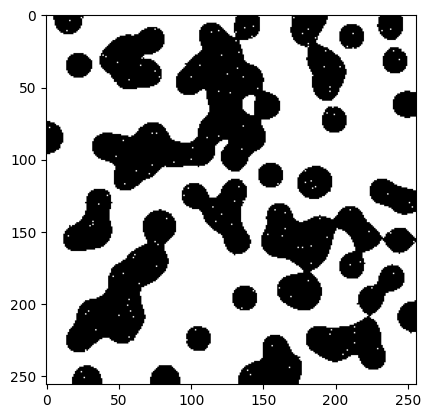

In [974]:
tmp = np.logical_not(reconstruct_img) #Invierte los valores de la imagen
plt.imshow(tmp, cmap=plt.cm.gray)

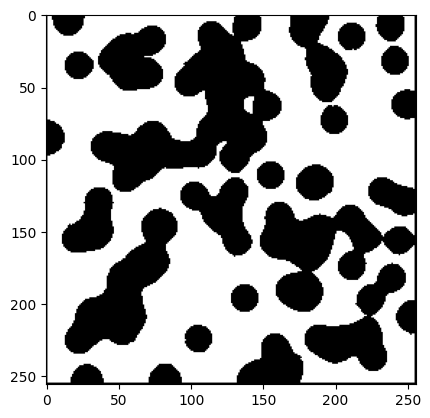

In [975]:
eroded_tmp = sp.ndimage.binary_erosion(tmp) #Al invertir la imagen ahora el ruido que no estaba aislado obtiene valores de 1 y se puede eliminar
plt.imshow(eroded_tmp, cmap=plt.cm.gray)

0.0053558349609375
0.0004425048828125


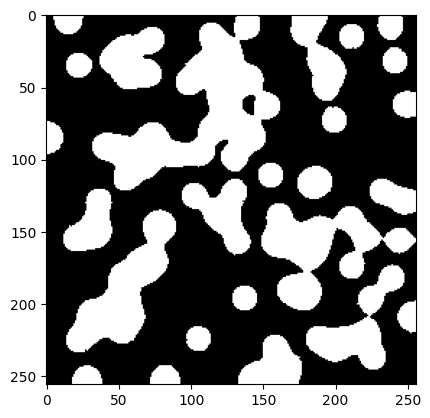

In [976]:
reconstruct_final = np.logical_not(sp.ndimage.binary_propagation(eroded_tmp, mask=tmp)) #Se reconstruyen los bordes y se vuelve a invertir la imagen para tener la imagen original sin ruido
plt.imshow(reconstruct_final, cmap=plt.cm.gray)
print(np.abs(mask - close_img).mean())
print(np.abs(mask - reconstruct_final).mean())#Al parecer el segundo metodo elimina el ruido y conserva mas datos de la imagen original

# Obtener informacion medible de la imagen

## Zonas o elementos conectados

25

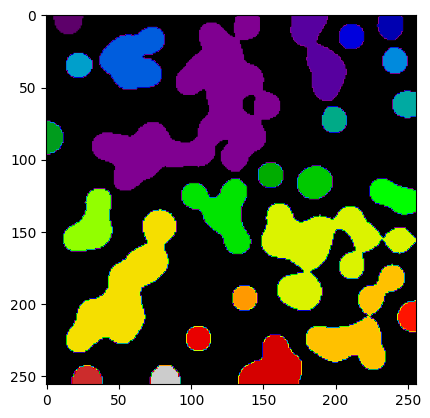

In [977]:
label_im, nb_labels = sp.ndimage.label(mask) #Etiqueta los objetos o zonas en la imagen(Primera variable) y devuelve el numero de etiquetas o zonas (segunda variable)
plt.imshow(label_im,cmap=plt.cm.nipy_spectral)
nb_labels #Numero de etiquetas en la imagen

In [978]:
sizes = sp.ndimage.sum(mask, label_im, range(nb_labels + 1))
sizes #Tamaño de las etiquetas

array([   0.,  239., 6220., 1213.,  271.,  243., 1366.,  249.,  249.,
        256.,  252.,  218.,  242.,  438., 1323.,  550.,  952., 3391.,
       3017., 1863.,  241.,  222.,  241.,  988.,  220.,  227.])

In [979]:
mean_vals = sp.ndimage.sum(im, label_im, range(nb_labels + 1))
mean_vals #Valor promedio de las etiquetas

array([17.59648633,  0.7542287 , 19.94002923,  4.22897208,  0.72715267,
        0.6143209 ,  4.09777492,  0.62583599,  0.62511324,  0.72460399,
        0.63101808,  0.79341572,  0.61272492,  1.58464117,  3.97781801,
        1.53647736,  3.25156204, 12.69659035, 11.43893412,  5.53018502,
        0.60831766,  0.77992945,  0.60824873,  4.4760549 ,  0.77718716,
        0.76237724])

Hay alguna forma de saber a que parte de la imagen corresponde cada valor? Ademas de por el color que tenga segun el cmap como en este caso los de mayor valor son los rojos

In [980]:
mask_size = sizes < 1000 
mask_size #Mascara para eliminar las etiquetas que tengan un tamaño menor a 1000

array([ True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


(256, 256)

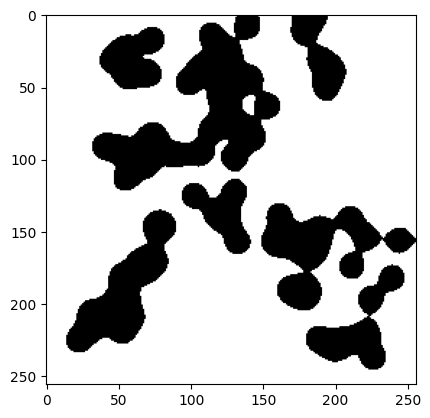

In [981]:
remove_pixel = mask_size[label_im] 
plt.imshow(remove_pixel,cmap=plt.cm.gray) #Al parecer interpreta los True como algun valor y los False como 0
print(remove_pixel)
remove_pixel.shape

**label_im** se utiliza como un índice para **mask_size**. Aquí está el desglose de lo que sucede:

**label_im** contiene etiquetas (números enteros) que corresponden a diferentes regiones en la imagen.
**mask_size[label_im]** utiliza cada valor de **label_im** como un índice para acceder a **mask_size**.
Por ejemplo, si un píxel en **label_im** tiene el valor 3, entonces **mask_size[label_im]** accederá al valor en **mask_size[3]**.
El resultado es un arreglo booleano **remove_pixel** del mismo tamaño que **label_im**, donde cada elemento es True si la región correspondiente en **label_im** es menor que 1000 píxeles (según **mask_size**).

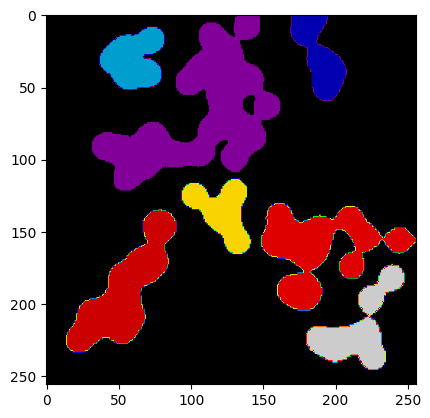

In [982]:
label_im[remove_pixel] = 0 #Todo lo que aparezca como True en la mascara se convierte en 0(Elimina las etiquetas que tengan un tamaño menor a 1000)
plt.imshow(label_im,cmap=plt.cm.nipy_spectral)

In [983]:
labels = np.unique(label_im)
labels #Se obtienen las etiquetas que quedaron despues de eliminar las que tenian un tamaño menor a 1000

array([ 0,  2,  3,  6, 14, 17, 18, 19])

In [984]:
label_im = np.searchsorted(labels, label_im)
label_im #Se reetiquetan las zonas de la imagen

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

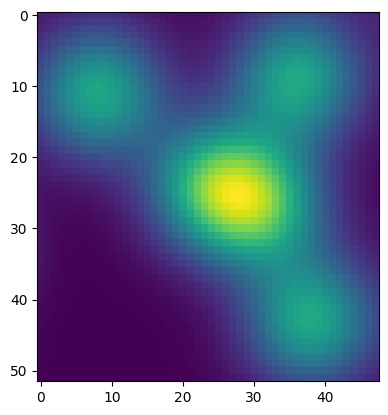

In [985]:
slice_x, slice_y = sp.ndimage.find_objects(label_im == 4)[0] #Dentro de la imagen se busca la etiqueta 4 y se obtiene la posicion de la etiqueta
roi = im[slice_x, slice_y] # Se obtiene la region de interes
plt.imshow(roi)

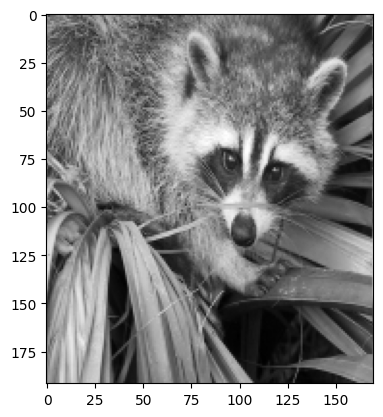

In [986]:
f = sp.datasets.face(gray=True)
sx, sy = f.shape
X, Y = np.ogrid[0:sx, 0:sy] #Se generan dos matrices abiertas X y Y que representan las coordenadas de los píxeles en la imagen.
regions = (sy//6) * (X//4) + (Y//6) #Se crean regiones de 4x6 pixeles
block_mean = sp.ndimage.mean(f, labels=regions, index=np.arange(1,
    regions.max() +1)) #Se obtiene el promedio de cada region 
block_mean.shape = (sx // 4, sy // 6) #Reajusta la imagen a 4 veces menos de alto y 6 veces menos de ancho
plt.imshow(block_mean, cmap=plt.cm.gray)

**regions** es una matriz del mismo tamaño que la imagen original **f**, donde cada elemento representa una región específica de 4x6 píxeles.

**X // 4 y Y // 6** dividen las coordenadas **X** y **Y** en bloques de tamaño 4 en altura y 6 en anchura.

**(sy // 6) * (X // 4) + (Y // 6)** asigna un identificador único a cada bloque.

## Otras medidas

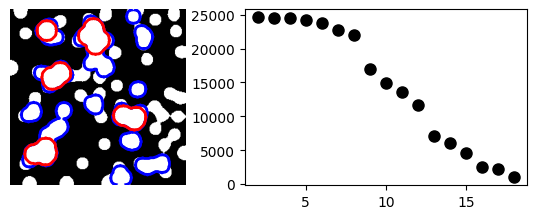

In [987]:
def disk_structure(n):
    struct = np.zeros((2 * n + 1, 2 * n + 1))
    x, y = np.indices((2 * n + 1, 2 * n + 1))
    mask = (x - n) ** 2 + (y - n) ** 2 <= n**2
    struct[mask] = 1
    return struct.astype(bool)
#Se crea una estructura circular con un radio de n pixeles

def granulometry(data, sizes=None):
    s = max(data.shape)
    if sizes is None:
        sizes = range(1, s / 2, 2)
    granulo = [
        sp.ndimage.binary_opening(data, structure=disk_structure(n)).sum()
        for n in sizes
    ]
    return granulo
#Se crea una funcion que calcula la granulometria de una imagen

granulo = granulometry(mask, sizes=np.arange(2, 19))

plt.figure(figsize=(6, 2.2))

plt.subplot(121)
plt.imshow(mask, cmap=plt.cm.gray)
opened = sp.ndimage.binary_opening(mask, structure=disk_structure(10))
opened_more = sp.ndimage.binary_opening(mask, structure=disk_structure(14))
plt.contour(opened, [0.5], colors="b", linewidths=2)
plt.contour(opened_more, [0.5], colors="r", linewidths=2)
plt.axis("off")
plt.subplot(122)
plt.plot(np.arange(2, 19), granulo, "ok", ms=8)


plt.subplots_adjust(wspace=0.02, hspace=0.15, top=0.95, bottom=0.15, left=0, right=0.95)

El código define funciones para crear estructuras de disco y calcular la granulometría de una imagen binaria. Luego aplica aperturas binarias con diferentes tamaños de disco a la imagen y grafica los resultados, mostrando tanto la imagen procesada con contornos de discos específicos como la granulometría calculada.